## Dependencies

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

## Import and Prep Data

In [2]:
# Player data from CSV
stats = pd.read_csv("../resources/game_skater_stats.csv")
stats

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,...,0,1.0,1.0,0,0,1.0,1,858,97,0
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,...,0,1.0,2.0,0,0,2.0,0,1177,0,219
2,2016020045,8474668,4,915,0,0,1,1.0,0,0,...,0,2.0,0.0,0,0,0.0,-1,805,0,110
3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,...,27,0.0,0.0,0,0,0.0,-1,1083,19,265
4,2016020045,8471762,4,676,0,0,3,2.0,0,0,...,0,0.0,1.0,0,0,0.0,-1,613,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945825,2018030417,8475807,6,501,0,0,1,2.0,0,0,...,0,0.0,0.0,0,0,0.0,-1,501,0,0
945826,2018030417,8475149,6,1062,0,0,2,0.0,0,0,...,1,1.0,0.0,0,0,0.0,-1,957,0,105
945827,2018030417,8475745,6,913,0,0,2,3.0,0,0,...,11,1.0,0.0,0,0,0.0,0,913,0,0
945828,2018030417,8478443,6,1006,0,0,1,1.0,0,0,...,0,0.0,1.0,0,0,2.0,-1,1006,0,0


In [16]:
# Group player ids to get total player stats
player_stats = stats.groupby("player_id").sum()

In [27]:
player_stats["TOI_min"] = player_stats["timeOnIce"]/60

In [28]:
# Format X array for scatter plotting 
X = np.array([list(a) for a in zip(player_stats["TOI_min"],player_stats["assists"])])

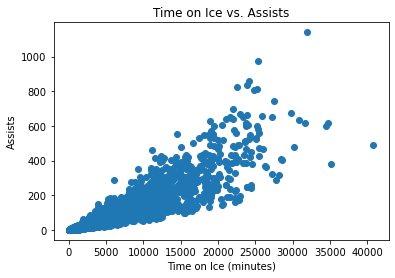

In [29]:
# Plot Player Data
plt.scatter(X[:,0], X[:,1])
plt.title("Time on Ice vs. Assists")
plt.xlabel("Time on Ice (minutes)") ### Make this hours?
plt.ylabel("Assists")
plt.show()

In [30]:
# Create kmeans model
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
predicted_clusters = kmeans.predict(X)

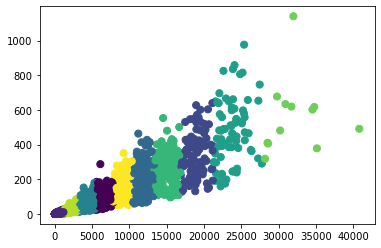

In [31]:
# Plot Clusters
plt.scatter(X[:,0], X[:,1], c=predicted_clusters, s=50, cmap="viridis")
plt.show()